In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web   
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
import datetime
import cufflinks as cf
import plotly.offline as plyo
import plotly as ply
import plotly.graph_objs as go
import yfinance as yf

plyo.init_notebook_mode(connected=True)

In [2]:
stock_list = ['GOOGL', 'JPM', 'MSFT', 'AAPL', 'VZ', 'AMZN', 'JNJ', 'MMM', 'BRK-B', 'BMY']
data = []

In [3]:
for stock in stock_list:
    stock_df = yf.download(stock, start='2015-1-1', end='2020-1-1', progress=True)
    stock_df.ffill(inplace=True)
    data.append(stock_df['Adj Close'] / stock_df['Adj Close'].shift(1) - 1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df = pd.DataFrame(data, index=stock_list).T
df.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY
Date,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.002092,0.004985,0.006674,-0.009513,0.003848,-0.005897,-0.000478,-0.001582,-0.006527,0.008131
2015-01-05,-0.019054,-0.031045,-0.009196,-0.028172,-0.008305,-0.020517,-0.006984,-0.022553,-0.014547,-0.015627
2015-01-06,-0.024679,-0.025929,-0.014677,0.000094,0.010092,-0.022833,-0.004914,-0.010663,-0.001088,-0.001707
2015-01-07,-0.002941,0.001526,0.012705,0.014022,-0.006453,0.010600,0.022076,0.007249,0.013893,0.012996


In [5]:
# df.to_csv('fund_top10.csv')

In [6]:
df.index = pd.to_datetime(df.index)
df = df.iloc[1:,]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-02 to 2019-12-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   1258 non-null   float64
 1   JPM     1258 non-null   float64
 2   MSFT    1258 non-null   float64
 3   AAPL    1258 non-null   float64
 4   VZ      1258 non-null   float64
 5   AMZN    1258 non-null   float64
 6   JNJ     1258 non-null   float64
 7   MMM     1258 non-null   float64
 8   BRK-B   1258 non-null   float64
 9   BMY     1258 non-null   float64
dtypes: float64(10)
memory usage: 108.1 KB


In [7]:
def total_return_from_returns(returns):
    """Retuns the return between the first and last value of the DataFrame.
    Parameters
    ----------
    returns : pandas.Series or pandas.DataFrame
    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return (returns + 1).prod() - 1

In [8]:
monthly_return = df.groupby([df.index.year, df.index.month]).apply(total_return_from_returns)
monthly_return.tail(12)

GOOGL       JPM      MSFT      AAPL        VZ      AMZN  \
Date Date                                                               
2019 1     0.077448  0.068844  0.028158  0.055154 -0.010412  0.144317   
     2     0.000586  0.008309  0.077358  0.044777  0.033781 -0.045906   
     3     0.044685 -0.029992  0.052754  0.097026  0.038827  0.085936   
     4     0.018753  0.155171  0.107343  0.056436 -0.022844  0.081859   
     5    -0.077117 -0.086945 -0.049481 -0.124213 -0.049659 -0.078613   
     6    -0.021419  0.055115  0.083118  0.130519  0.051150  0.066792   
     7     0.125046  0.044913  0.017244  0.076394 -0.022374 -0.014179   
     8    -0.022714 -0.052931  0.015037 -0.016461  0.052289 -0.048474   
     9     0.025711  0.071273  0.008487  0.072961  0.037827 -0.022733   
     10    0.030840  0.069935  0.031216  0.110684  0.012246  0.023475   
     11    0.035979  0.054755  0.059463  0.077554 -0.003804  0.013587   
     12    0.027069  0.057984  0.041749  0.098784  0.019256  0.026122   

                JNJ       MMM     BRK-B       BMY  
Date Date                                          
2019 1     0.031228  0.051223  0.006661 -0.042726  
     2     0.033560  0.042555 -0.020629  0.046384  
     3     0.023053  0.001881 -0.002037 -0.076462  
     4     0.010087 -0.087929  0.078750 -0.018242  
     5    -0.064820 -0.149824 -0.089013 -0.022830  
     6     0.061990  0.085070  0.079779 -0.000441  
     7    -0.065049  0.007961 -0.036309 -0.012050  
     8    -0.006897 -0.065935 -0.009833  0.082414  
     9     0.007946  0.016572  0.022664  0.054920  
     10    0.020559  0.003589  0.021921  0.140840  
     11    0.048490  0.037880  0.036316 -0.007495  
     12    0.060950  0.039171  0.028143  0.127327

In [9]:
# monthly_return.to_csv('monthly_return.csv')

In [10]:
df.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY
Date,,,,,,,,,,
2015-01-02,-0.002092,0.004985,0.006674,-0.009513,0.003848,-0.005897,-0.000478,-0.001582,-0.006527,0.008131
2015-01-05,-0.019054,-0.031045,-0.009196,-0.028172,-0.008305,-0.020517,-0.006984,-0.022553,-0.014547,-0.015627
2015-01-06,-0.024679,-0.025929,-0.014677,0.000094,0.010092,-0.022833,-0.004914,-0.010663,-0.001088,-0.001707
2015-01-07,-0.002941,0.001526,0.012705,0.014022,-0.006453,0.010600,0.022076,0.007249,0.013893,0.012996
2015-01-08,0.003484,0.022347,0.029418,0.038422,0.021433,0.006836,0.007863,0.023967,0.016725,0.024983


In [11]:
var = []
es = []

for col in df.columns:
    VaR_95 = df[col].quantile(0.05)
    var.append(VaR_95)
    
    ES_95 = df[col][df[col] <= VaR_95].mean()
    es.append(ES_95)
    
VaR = pd.DataFrame(var, columns=['VaR'], index=stock_list)
ES = pd.DataFrame(es, columns=['ES'], index=stock_list)
VaR_ES = pd.concat([VaR, ES], axis=1)
VaR_ES

,VaR,ES
GOOGL,-0.023336,-0.033507
JPM,-0.020872,-0.030157
MSFT,-0.021057,-0.033567
AAPL,-0.024996,-0.036180
VZ,-0.016372,-0.024241
AMZN,-0.025582,-0.040740
JNJ,-0.015046,-0.024934
MMM,-0.018423,-0.030652
BRK-B,-0.014960,-0.024245
BMY,-0.022954,-0.040110


In [12]:
def VaR_plotting(ret, VaR_95, VaR_99, ES_95, ES_99):
    fig = plt.figure(figsize=(10, 6))
    plt.hist(ret, bins=50, alpha=0.5)
    plt.plot([VaR_95, VaR_95], [0, 100], 'r:', lw=2, label='95% VaR')
    plt.plot([VaR_99, VaR_99], [0, 100], 'p:', lw=2, label='99% VaR')
    plt.legend()
    plt.show()
    
    print(ret)
    print('VaR 95% Confidence Level: ', VaR_95)
    print('ES 95% Connfidence Level: ', ES_95)
    print('\n')
    
    print('VaR 99% Confidence Level: ', VaR_99)
    print('ES 99% Connfidence Level: ', ES_99)
    print('\n\n')

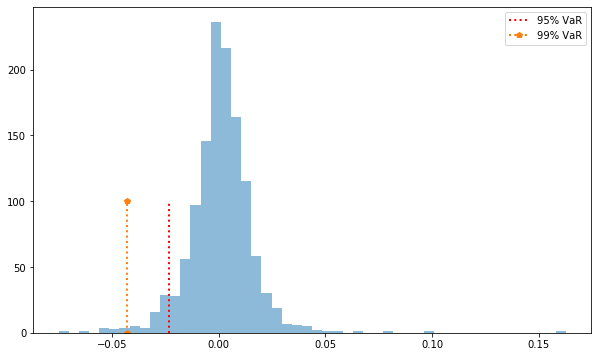

Date
2015-01-02   -0.002092
2015-01-05   -0.019054
2015-01-06   -0.024679
2015-01-07   -0.002941
2015-01-08    0.003484
                ...   
2019-12-24   -0.004590
2019-12-26    0.013418
2019-12-27   -0.005747
2019-12-30   -0.011021
2019-12-31   -0.000239
Name: GOOGL, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.02333585964153129
ES 95% Connfidence Level:  -0.03350722298944518


VaR 99% Confidence Level:  -0.04289140665975695
ES 99% Connfidence Level:  -0.051949191191849604





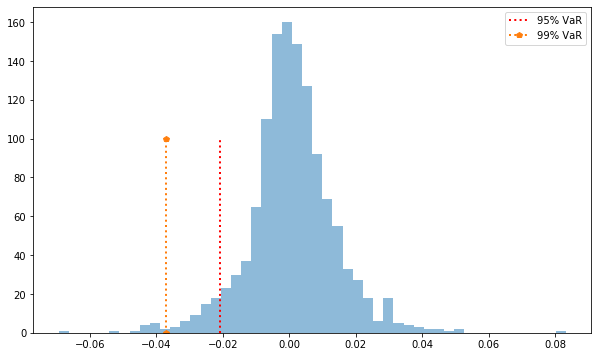

Date
2015-01-02    0.004985
2015-01-05   -0.031045
2015-01-06   -0.025929
2015-01-07    0.001526
2015-01-08    0.022347
                ...   
2019-12-24    0.002770
2019-12-26    0.010612
2019-12-27    0.000719
2019-12-30   -0.003665
2019-12-31    0.005554
Name: JPM, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.020872387777225696
ES 95% Connfidence Level:  -0.03015717583363655


VaR 99% Confidence Level:  -0.03710271027116212
ES 99% Connfidence Level:  -0.04544801849890196





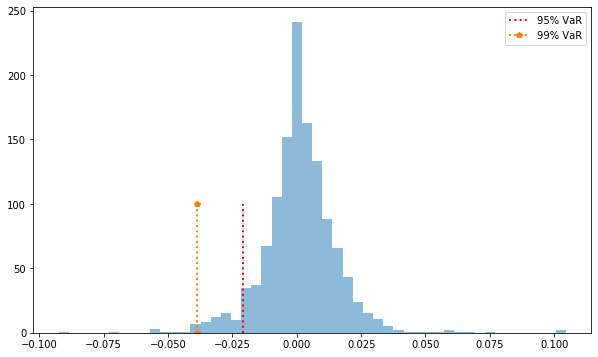

Date
2015-01-02    0.006674
2015-01-05   -0.009196
2015-01-06   -0.014677
2015-01-07    0.012705
2015-01-08    0.029418
                ...   
2019-12-24   -0.000191
2019-12-26    0.008197
2019-12-27    0.001828
2019-12-30   -0.008619
2019-12-31    0.000698
Name: MSFT, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.02105692502011284
ES 95% Connfidence Level:  -0.03356711851369865


VaR 99% Confidence Level:  -0.03864168517826057
ES 99% Connfidence Level:  -0.05138933153563406





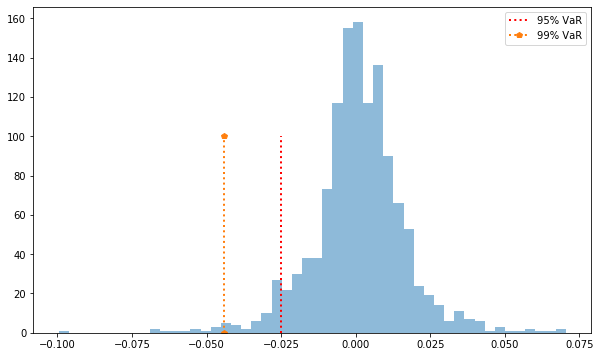

Date
2015-01-02   -0.009513
2015-01-05   -0.028172
2015-01-06    0.000094
2015-01-07    0.014022
2015-01-08    0.038422
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: AAPL, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.024995603774639722
ES 95% Connfidence Level:  -0.03617996893555579


VaR 99% Confidence Level:  -0.044293209498030756
ES 99% Connfidence Level:  -0.057945075765993455





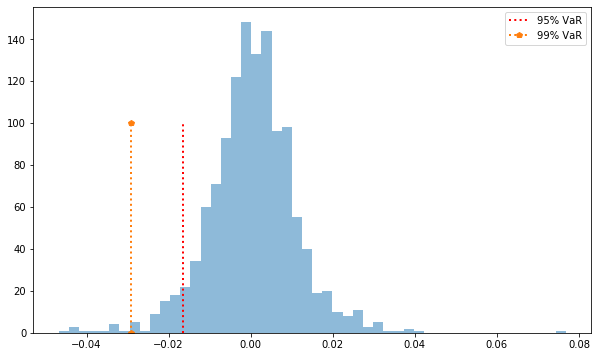

Date
2015-01-02    0.003848
2015-01-05   -0.008305
2015-01-06    0.010092
2015-01-07   -0.006453
2015-01-08    0.021433
                ...   
2019-12-24   -0.001954
2019-12-26    0.000163
2019-12-27    0.003916
2019-12-30   -0.005201
2019-12-31    0.003104
Name: VZ, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.01637213619068335
ES 95% Connfidence Level:  -0.02424088448588725


VaR 99% Confidence Level:  -0.029151395231754487
ES 99% Connfidence Level:  -0.03717101099290505





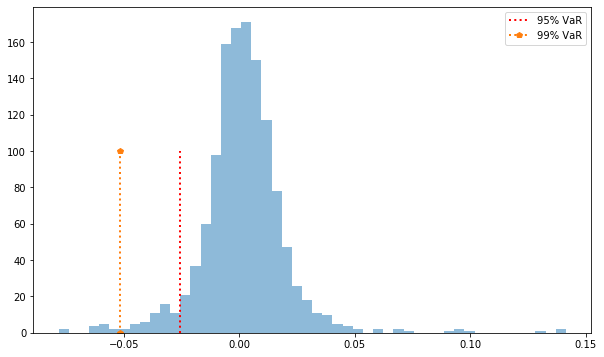

Date
2015-01-02   -0.005897
2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-08    0.006836
                ...   
2019-12-24   -0.002114
2019-12-26    0.044467
2019-12-27    0.000551
2019-12-30   -0.012253
2019-12-31    0.000514
Name: AMZN, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.025581920785383155
ES 95% Connfidence Level:  -0.04073964808007926


VaR 99% Confidence Level:  -0.05166770788839779
ES 99% Connfidence Level:  -0.06171282284049811





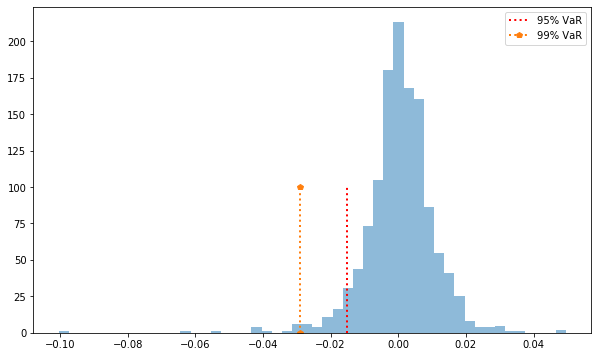

Date
2015-01-02   -0.000478
2015-01-05   -0.006984
2015-01-06   -0.004914
2015-01-07    0.022076
2015-01-08    0.007863
                ...   
2019-12-24   -0.003483
2019-12-26   -0.000685
2019-12-27   -0.000549
2019-12-30   -0.003087
2019-12-31    0.003923
Name: JNJ, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.015046156265554788
ES 95% Connfidence Level:  -0.024934386059281295


VaR 99% Confidence Level:  -0.029030864806393906
ES 99% Connfidence Level:  -0.044121635112547734





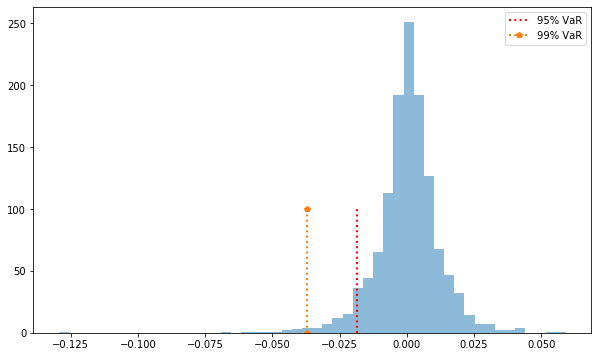

Date
2015-01-02   -0.001582
2015-01-05   -0.022553
2015-01-06   -0.010663
2015-01-07    0.007249
2015-01-08    0.023967
                ...   
2019-12-24   -0.010030
2019-12-26   -0.000509
2019-12-27    0.003794
2019-12-30   -0.008067
2019-12-31    0.003356
Name: MMM, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.018423415827158358
ES 95% Connfidence Level:  -0.030652071077846888


VaR 99% Confidence Level:  -0.03717548589080004
ES 99% Connfidence Level:  -0.053587379862029876





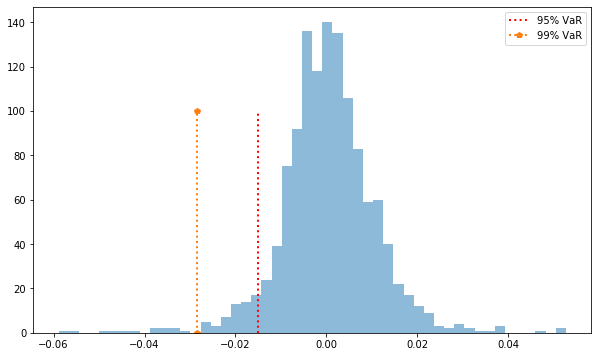

Date
2015-01-02   -0.006527
2015-01-05   -0.014547
2015-01-06   -0.001088
2015-01-07    0.013893
2015-01-08    0.016725
                ...   
2019-12-24   -0.000044
2019-12-26    0.004346
2019-12-27   -0.001369
2019-12-30   -0.001680
2019-12-31    0.003278
Name: BRK-B, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.014960466826269192
ES 95% Connfidence Level:  -0.024245416308827854


VaR 99% Confidence Level:  -0.02855482357817691
ES 99% Connfidence Level:  -0.04140775102760138





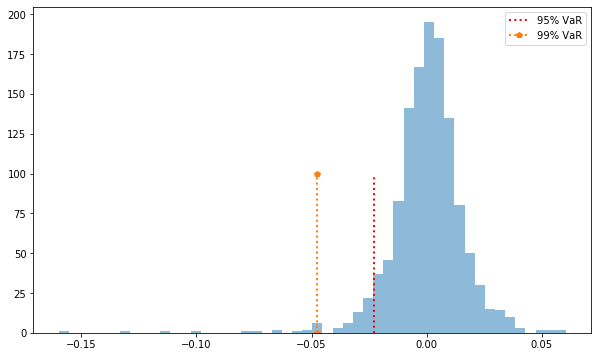

Date
2015-01-02    0.008131
2015-01-05   -0.015627
2015-01-06   -0.001707
2015-01-07    0.012996
2015-01-08    0.024983
                ...   
2019-12-24   -0.000791
2019-12-26    0.012666
2019-12-27    0.002814
2019-12-30   -0.006392
2019-12-31    0.007218
Name: BMY, Length: 1258, dtype: float64
VaR 95% Confidence Level:  -0.022954497210326618
ES 95% Connfidence Level:  -0.0401103793011678


VaR 99% Confidence Level:  -0.0475561464800332
ES 99% Connfidence Level:  -0.08051779566473145





In [13]:
for col in df.columns:
    VaR_95 = np.percentile(df[col], 5)
    ES_95 = df[col][df[col] <= VaR_95].mean()
    
    VaR_99 = np.percentile(df[col], 1)
    ES_99 = df[col][df[col] <= VaR_99].mean()
    
    VaR_plotting(df[col], VaR_95, VaR_99, ES_95, ES_99)